# Домашнее задание

## Импортируем необходимые библиотеки:

In [146]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Создадим класс линейной регрессии

In [147]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        # Инициализация весов и смещения
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Градиентный спуск
        for _ in range(self.iterations):
            self.update_weights(X, Y)

    def update_weights(self, X, Y):
        n_samples = X.shape[0]

        # Предсказанные значения
        Y_pred = self.predict(X)

        # Вычисление градиентов
        dw = (1 / n_samples) * np.dot(X.T, (Y_pred - Y))
        db = (1 / n_samples) * np.sum(Y_pred - Y)

        # Обновление весов и смещения
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [148]:
# Функция для создания анимации
def create_animation(X, Y, model):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim([min(X) - 0.5, max(X) + 0.5])
    ax.set_ylim([min(Y) - 0.5, max(Y) + 0.5])
    ax.set_xlabel('Число лет опыта')
    ax.set_ylabel('Зарплата')
    ax.set_title('Анимация зависимости зарплаты от опыта')

    # Инициализация линии регрессии и точек данных
    line, = ax.plot([], [], color='red', label='Линия регрессии')
    scatter = ax.scatter([], [], color='blue', label='Исходные данные')
    ax.legend()

    # Перемешиваем индексы для случайного выбора точек
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    # Функция инициализации анимации
    def init():
        line.set_data([], [])
        scatter.set_offsets(np.empty((0, 2)))
        return line, scatter

    # Функция обновления анимации
    def animate(i):
        # Выбираем случайные точки данных
        selected_indices = indices[:i + 1]
        X_frame = X[selected_indices]
        Y_frame = Y[selected_indices]

        # Обучаем модель на текущем наборе данных
        model.fit(X_frame, Y_frame)

        # Обновление линии регрессии
        x_values = np.linspace(min(X) - 0.5, max(X) + 0.5, 100)
        y_values = model.predict(x_values.reshape(-1, 1))
        line.set_data(x_values, y_values)

        # Обновление точек данных
        scatter.set_offsets(np.c_[X_frame, Y_frame])

        return line, scatter

    # Создание анимации
    ani = animation.FuncAnimation(
        fig, animate, frames=len(X), init_func=init, interval=100, repeat=True
    )

    # Отображение анимации в Jupyter Notebook
    return HTML(ani.to_jshtml())


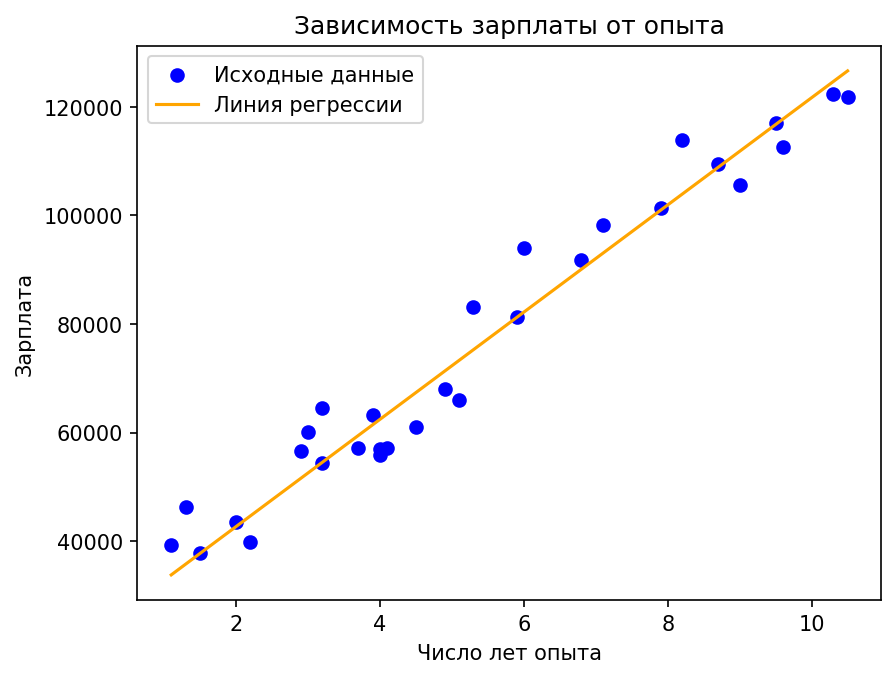

In [149]:
df = pd.read_csv( "./salary_data.csv" )

X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

model = LinearRegression(iterations = 1000, learning_rate = 0.01)
model.fit(X, Y)

Y_pred = model.predict(X)

plt.scatter(X, Y, color = 'blue', label='Исходные данные')
plt.plot(X, Y_pred, color = 'orange', label='Линия регрессии')
plt.title('Зависимость зарплаты от опыта')
plt.xlabel('Число лет опыта')
plt.ylabel('Зарплата')
plt.legend()

plt.show()



In [150]:
# Создание анимации
create_animation(X, Y, model)